You can edit this notebook after copying to your drive.    
Click "Playgroundで開く" above and try them!   
  
(C) 2019 Tokyo Institute of Technology All Rights Reserved.  
@author Tatsuya Hiraoka

# Polynomial Regression
- p16
- Check underfitting and overfitting

In [0]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

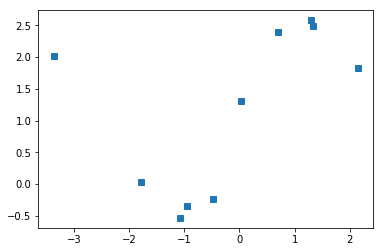

In [2]:
# create toy dataset
np.random.seed(1234)

n = 10
x = 1.5 * np.random.randn(n, 1)

omega = 2 * np.pi * 0.2

noise = 0.2 * np.random.randn(n,1)
ratio = 1.5
y = ratio * np.sin(omega * x) + 1 + noise

X = np.concatenate([x, np.ones((n,1))], axis=1)

plt.plot(x,y,'s')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

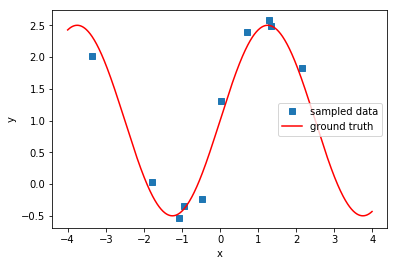

In [7]:
# ground truth
rr = 4;

xg = np.arange(-rr, rr, 0.01)
yg = ratio * np.sin(omega*xg) + 1

plt.plot(x,y,'s', label='sampled data')
plt.plot(xg,yg, 'red', label='ground truth')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [0]:
# prepare for regression

# solver
def mldivide(A, b):
  piA = np.linalg.pinv(A)
  x = np.dot(piA, b)
  return x

def show_pr(x, y, xg, yg, res):
  # show gold
  plt.plot(x,y,'s', label='sampled data')
  plt.plot(xg, yg, 'red', label='ground truth')
  plt.xlim(np.min(x), np.max(x))
  plt.ylim(np.min(yg), np.max(yg))
  
  # show estimate
  plt.plot(xg, res, 'blue', label='estimation')
  
  plt.legend()
  plt.xlabel('x')
  plt.ylabel('y')

def estimate_pr(p):  
  polyX = np.concatenate([np.ones((n,1))]
                       + [x**i for i in range(1,p)], axis=1)
  polyxg = np.vstack([np.ones((xg.shape[0]))]
                    + [xg**i for i in range(1,p)]).T

  polyPX = polyX[:, :p+2]
  polyPParmHat = mldivide(polyPX,y)
  
  res = np.dot(polyxg[:,:p+2], polyPParmHat)
  return res


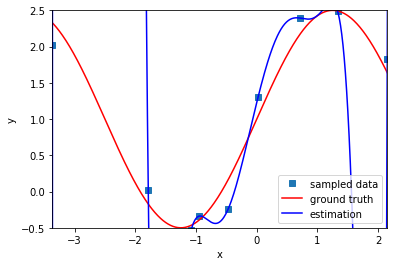

In [12]:
### check difference by p ###
p = 12
### check difference by p ###

res = estimate_pr(p)
show_pr(x, y, xg, yg, res)

# Ridge
- p18

In [0]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

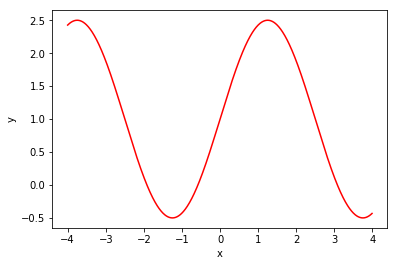

In [18]:
# prepare dataset
n = 10
omega = 2 * np.pi * 0.2
ratio = 1.5
bias = 1.0

rr = 4
xg = np.arange(-rr, rr, 0.01)
yg = ratio * np.sin(omega * xg) + bias;

plt.plot(xg, yg, 'red')
plt.xlabel('x')
plt.ylabel('y')

In [0]:
# prepare
def estimate_ridge(p):
  x = 1.5 * np.random.randn(n, 1)
  noise = 0.2 * np.random.randn(n,1)
  y = ratio * np.sin(omega * x) + bias + noise
  X = np.concatenate([x, np.ones((n,1))], axis=1)

  polyPX = np.concatenate([np.ones((n,1))]
                       + [x**i for i in range(1, p+1)], axis=1)

  lam = 10.0
  polyPParamHat = np.dot(polyPX.T, polyPX)  + lam * mldivide(np.eye(p+1), np.dot(polyPX.T,y));        
  polyPParamHat = mldivide(np.dot(polyPX.T, polyPX)  + lam * np.eye(p+1), np.dot(polyPX.T,y));     

  polyxg = np.vstack([np.ones((xg.shape[0]))]
                  + [xg**i for i in range(1,p+1)]).T
  return np.dot(polyxg, polyPParamHat)  

Text(0, 0.5, 'y')

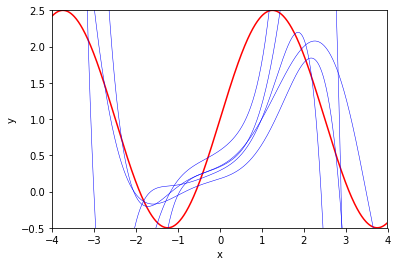

In [24]:
### check difference by p ###
p = 6
### check difference by p ###

trial = 5

plt.plot(xg, yg,'red')
plt.xlim(np.min(xg), np.max(xg))
plt.ylim(np.min(yg), np.max(yg))

for t in range(trial):
  plt.plot(xg, estimate_ridge(p), 'blue', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
